Here I will extract the data about Chinese landscape paintings and conduct data analysis on the collection.
the csv I use is landscape_asian_art.csv 

In [1]:


import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Read in your data
df = pd.read_csv('/content/landscape_asian_art.csv')

In [3]:
# Get the unique values in the "culture" column
culture = pd.unique(df["culture"])

# Count the number of occurrences of each country
counts = df["culture"].value_counts()

# Get the top 5 countries
top_5 = counts.head(5)




# Create a new DataFrame with the country names as the index and the count as the values
data = pd.DataFrame(top_5)

# Reset the index and rename the columns
data.reset_index(inplace=True)
data.columns = ["culture", "count"]

print(data)



                 culture  count
0                  China   1022
1                  Japan   1015
2                  Korea     14
3                  India     13
4  West Bengal, Calcutta      6


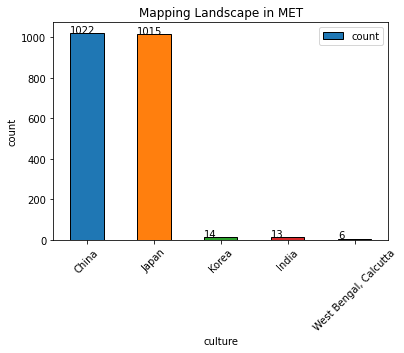

In [4]:
# Visualize the result
colors = ["#1f77b4","#ff7f0e","#2ca02c","#d62728","#9467bd"]
ax= data.plot(kind='bar', x='culture', y='count', color=colors, edgecolor = 'black', width=0.5, rot=90)

for i, v in enumerate(data["count"]):
    plt.text(i-.25, v, str(v))


plt.xlabel("culture")
plt.ylabel("count")
plt.title("Mapping Landscape in MET")
plt.xticks(rotation=45)

plt.show()

In [5]:


# Select the rows where the "culture" column is "China"
df_china = df[df["culture"] == "China"]

# Save the selected rows to a new CSV file
df_china.to_csv("Chinese_landscape.csv", index=False)

In [6]:
import numpy as np

# load the csv file into a DataFrame
df = pd.read_csv("Chinese_landscape.csv") 
empty_cells = df["period"].isnull().sum()

#print("Number of empty cells in 'period' column:", empty_cells)

# replace empty cells in "period" column with "unknown"
df["period"].fillna(value="unknown", inplace=True)


In [7]:
# count the number of each time period in the "period" column

# Get the frequency of each value in the "period" column
count_period = df['period'].value_counts()

count_period.to_csv("periods.csv",sep=',',index=True)




In [10]:
# define a mapping of inconsistent values to their consistent equivalents
mapping = {
    "Contemporary": "Contemporary",
    "Modern": "Modern",
    "Republic period (1912–49)": "Republic period",
    "Qing dynasty (1644–1911)": "Qing dynasty",
    "Qing dynasty (1644–1911), Kangxi period (1662–1722)":"Qing dynasty",
    "Qing dynasty (1644–1911), Qianlong period (1736–95)":"Qing dynasty",
    "Qing dynasty (1644–1911), Kangxi mark and period (1662–1722)":"Qing dynasty",
    "Qing dynasty (1644–1911), Qianlong mark and period (1736–95)":"Qing dynasty",
    "Qing dynasty (1644–1911), Yongzheng mark and period (1723–35)":"Qing dynasty",
    "Qing dynasty (1644–1911), Yongzheng period (1723–35)":"Qing dynasty",
    "late Qing dynasty (1644–1911)":"Qing dynasty",
    "Ming dynasty (1368–1644), Shunzhi period (1644–61)":"Qing dynasty",
    "Qing dynasty (1644–1911), Shunzhi period (1644–61)":"Qing dynasty",
    "Qing dynasty (1644–1911), Shunzhi (1644–61) period":"Qing dynasty",
    "Qing (1644–1911) dynasty":"Qing dynasty",
    "Ming dynasty (1368–1644), Transitional period":"Ming-Qing",
    "late Ming (1368–1644)–early Qing (1644–1911) dynasty":"Ming-Qing",
    "Late Ming (1368–1644) to early Qing (1644–1911) dynasty":"Ming-Qing",
    "Ming (1368–1644) to Qing dynasty (1644–1911)":"Ming-Qing",
    "late Ming dynasty (1368–1644)":"Ming dynasty",
    "Ming (1368–1644)–Qing (1644–1911) dynasty":"Ming-Qing",
    "Ming (1368–1644)– Qing dynasty (1644–1911)":"Ming-Qing",
    "late Ming (1368–1644)– early Qing (1644–1911) dynasty":"Ming-Qing",
    "Ming (1368–1644)–early Qing (1644–1911) dynasty":"Ming-Qing",
    "Ming dynasty (1368–1644)": "Ming dynasty",
    "Ming (1368–1644) dynasty": "Ming dynasty",
    "Ming Dynasty (1368–1644)":"Ming dynasty",
    "Ming dynasty (?) (1368–1644)":"Ming dynasty",
    "Ming dynasty (1368–1644), Chongzhen period (1628–44)":"Ming dynasty",
    "Ming dynasty (1368–1644), Tianqi period (1621–27)":"Ming dynasty",
    "Ming dynasty (1368–1644), Wanli mark and period (1573–1620)":"Ming dynasty",
    "Ming dynasty (1368–1644), Wanli period (1573–1620)":"Ming dynasty",
    "Ming dynasty (1368–1644), Jiajing mark and period (1522–66)":"Ming dynasty",
    "early Ming dynasty (1368–1644)":"Ming dynasty",
    "late Yuan (1271–1368)–early Ming (1368–1644) dynasty":"Yuan-Ming",
    "late Yuan dynasty (1271–1368)":"Yuan dynasty",
    "Yuan dynasty  (1271–1368)":"Yuan dynasty",
    "Yuan (1271–1368)–Ming (1368–1644) dynasty":"Yuan-Ming",
    "Yuan dynasty (1271–1368)": "Yuan dynasty",
    "Yuan (1271–1368)":"Yuan dynasty",
    "Southern Song (1127–1279)–Yuan (1271–1368) dynasty":"Southern Song-Yuan",
    "Southern Song dynasty (1127–1279)": "Southern Song",
    "Southern Tang dynasty (937–76)":"Souther Tang",
    "Song dynasty (960–1279)": "Song dynasty",
    "Song dynasty (960–1279":"Song dynasty",
    "Jin dynasty (1115–1234)": "Jin dynasty",
    "Tang dynasty (618–907)": "Tang dynasty",
    "Eastern Wei dynasty (534–550)": "Eastern Wei",
    "Northern Wei dynasty (386–534)": "Northern Wei",
    "Han dynasty (206 B.C.–A.D. 220)": "Han dynasty",
    "Five Dynasties (907–960)": "Five Dynasties",
    "Western Han dynasty (206 B.C.–A.D. 9)": "Western Han",
    "unknown": "unknown",
    "Qing dynasty (1644–1911) or Republic period (1912–49)":"unknown",
    "Qing dynasty (1644–1911) or Republic period (1912–1949)":"unknown",
    "Qing dynasty (?) (1644–1911)":"unknown",
    "Ming (1368–1644) or Qing dynasty (1644–1911)":"unknown", 
    "Ming (1368–1644) or Qing (1644–1911) dynasty":"unknown",
    "Late Yuan (1271–1368) or early Ming (1368–1644) dynasty":"unknown",
    "Yuan (1271–1368) or Ming (1368–1644) dynasty":"unknown",
    "late Qing dynasty (1644–1911) or early Republic period (1912–49)":"unknown",
    "Southern Song, Yuan or early Ming dynasty":"unknown",
    "Song dynasty (960–1279) or later":"unknown",
    "Five Dynasties (907–960) or Northern Song (960–1127) dynasty":"unknown",
    "Song (960–1279) or Jin (1115–1234) dynasty":"unknown",
    "Southern Song (1127–1279) or Yuan (1271–1368) dynasty":"unknown",
    "Ming dynasty (1368–1644) or later":"unknown",
    "probably Qing dynasty (1644–1911)":"unknown",
    "Ming dynasty (1368–1644) or earlier":"unknown",
    "Song dynasty (?) (960–1279)":"unknown",
    "Jin (1115–1234) or Yuan (1271–1368) dynasty":"unknown"
   
}

 # use the mapping to replace the inconsistent values 
df["period"] = df["period"].replace(mapping)

# save the cleaned data to a new csv file
df.to_csv("clean_Chinese_landscape.csv", index=False)

In [11]:
# count the number of each time period in the new clean sheet 

df2 = pd.read_csv("/content/clean_Chinese_landscape.csv") 


# Get the frequency of each value in the "period" column
count_period = df2['period'].value_counts()


count_period.to_csv("consistent_period.csv",sep=',',index=True)

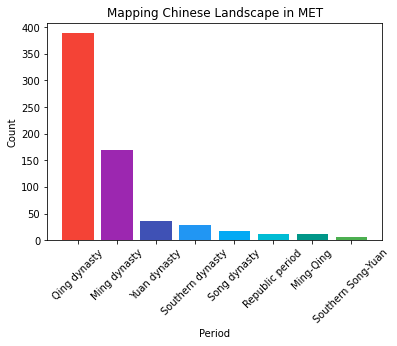

In [12]:
periods = ['Qing dynasty', 'Ming dynasty', 'Yuan dynasty', 'Southern dynasty', 'Song dynasty', 'Republic period', 'Ming-Qing', 'Southern Song-Yuan']
values = [389,169, 36, 28, 18, 12, 12,6]
colors = ['#F44336','#9C27B0','#3F51B5','#2196F3','#03A9F4','#00BCD4','#009688','#4CAF50']

plt.bar(periods, values, color=colors)
plt.title("Mapping Chinese Landscape in MET")
plt.xlabel("Period")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [13]:
# now we want to explore the accession year. I want to group the access year by decades.

import numpy as np

# get all values in accessionYear column

years_list = df['accessionYear'].tolist()

# Create the bins for the years
min_year = min(years_list)
max_year = max(years_list)
bins = np.arange(min_year, max_year+10, 10)

# Create the labels for the bins
labels = [f'{x}0s' for x in range(min_year//10+1, (max_year//10)+1)]

# Group the years into the bins
df['decade'] = pd.cut(df['accessionYear'], bins=bins, labels=labels)




In [14]:
df.to_csv("clean_Chinese_landscape_decade.csv", index=False)

In [15]:
# Get the frequency of each decade 

count_decade = df['decade'].value_counts()

print (count_decade)

count_decade.to_csv("which decade accquire the most Chinese landscape.csv",sep=',',index=True)


1980s    272
1910s    134
2000s    122
1920s     83
1940s     81
2010s     73
1970s     65
1990s     44
1960s     35
1950s     33
1930s     28
1900s     15
2020s     11
1880s      5
1890s      1
Name: decade, dtype: int64


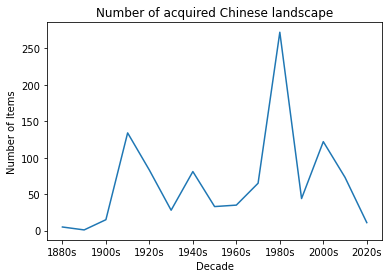

In [16]:
# Create a line chart of the binned data
df['decade'].value_counts().sort_index().plot(kind='line')

# Add axis labels
plt.xlabel('Decade')
plt.ylabel('Number of Items')
plt.title("Number of acquired Chinese landscape")


# Show the chart
plt.show()